In [1]:
# Plot for supernova cross sections white paper
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas

In [2]:
font = {'family' : 'Times',
        'size'   : 18}

plt.rc('font', **font)

['nue_e', 'nuebar_e', 'numu_e', 'ibd', 'nc_p', 'nue_C12', 'nue_C13', 'nc_nue_C12', 'nue_O16', 'nc_nue_O16', 'nue_Ar40', 'nc_nue_Ar40', 'coh_nc_Ar40']
------
 nue_e
------
 nuebar_e
------
 numu_e
------
 ibd
------
 nc_p
------
 nue_C12
------
 nue_C13
------
 nc_nue_C12
------
 nue_O16
------
 nc_nue_O16
------
 nue_Ar40
------
 nc_nue_Ar40
------
 coh_nc_Ar40


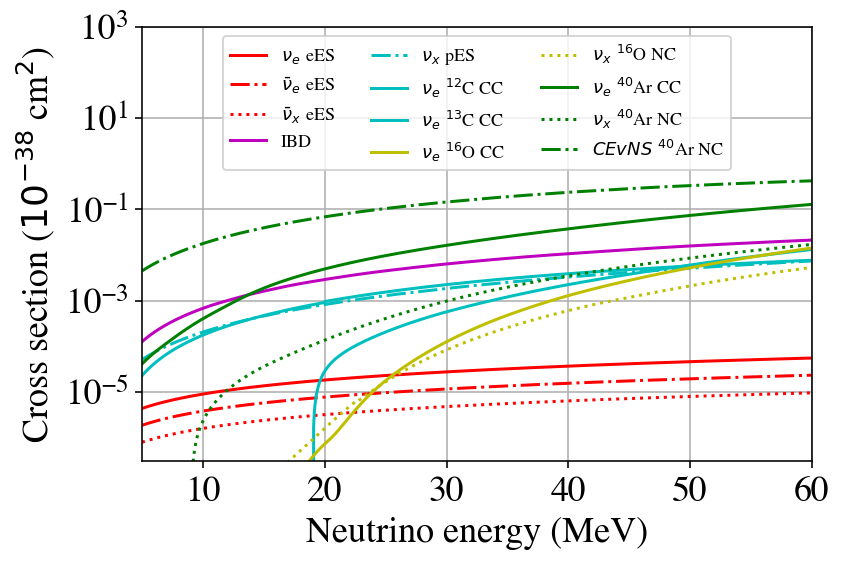

In [3]:
channelfile = "snwp_forplot"
chanfilename = "../channels/channels_"+channelfile+".dat"
chans = np.genfromtxt(chanfilename,dtype={'names': ('cname', 'num', 'cpstate','flavor','ntargets'),'formats': ('U16', 'i', 'U12','U12','i')})

print(list(chans['cname']))


ich=0
while ich<chans.size:
    #print(chans['cname'][ich],chans['cpstate'][ich])
    channame = chans['cname'][ich]
    print('------\n',channame)
    xscnfilename = "../xscns/xs_"+str(channame)+".dat"
    xscn = np.loadtxt(xscnfilename, comments='#', skiprows=0)
    energyingev = 10**xscn[:,0]
    energyinmev = energyingev*1000.
# Select the right column in the cross section file
    colnum=1

    if chans['flavor'][ich] == "e" and chans['cpstate'][ich] == "+":
        colnum=1
    if chans['flavor'][ich] == "m" and chans['cpstate'][ich] == "+":
        colnum=2
    if chans['flavor'][ich] == "t" and chans['cpstate'][ich] == "+":
        colnum=3
    if chans['flavor'][ich] == "e" and chans['cpstate'][ich] == "-":
        colnum=4
    if chans['flavor'][ich] == "m" and chans['cpstate'][ich] == "-":
        colnum=5
    if chans['flavor'][ich] == "t" and chans['cpstate'][ich] == "-":
        colnum=6

    xscnval = xscn[:,colnum]*energyingev
# Targets per reference target (for example number of electrons per atom, if you want xscn per atom)   
    target_factor = chans['ntargets'][ich]

# Only plot the ones we want

    xscnval = xscnval*target_factor
    if chans['cname'][ich] == "ibd":
        plt.plot(energyinmev,xscnval,label=r'IBD',color='m') 
    if chans['cname'][ich] == "nc_p":
        plt.plot(energyinmev,xscnval,label=r'$\nu_x~$pES',color='c', linestyle='dashdot') 
    if chans['cname'][ich] == "nue_C12":
        plt.plot(energyinmev,xscnval,label=r'$\nu_e~^{12}$C CC',color='c')
#        print(energyinmev,xscnval)
    if chans['cname'][ich] == "nue_C13":
        plt.plot(energyinmev,xscnval,label=r'$\nu_e~^{13}$C CC',color='c',linestyle = '-') 
#        df = pandas.DataFrame({"x": energyinmev, "y": xscnval})
#        pandas.set_option("display.max_rows", None, "display.max_columns", None)
#        print(df)
    if chans['cname'][ich] == "nc_nue_C13":
        plt.plot(energyinmev,xscnval,label=r'$\nu_x~^{12}$C NC',color='c', linestyle=':') 
    if chans['cname'][ich] == "nue_O16":
        plt.plot(energyinmev,xscnval,label=r'$\nu_e~^{16}$O CC',color='y') 
    if chans['cname'][ich] == "nc_nue_O16":
        plt.plot(energyinmev,xscnval,label=r'$\nu_x~^{16}$O NC',color='y', linestyle = ':')
    if chans['cname'][ich] == "nue_Ar40":
        plt.plot(energyinmev,xscnval,label=r'$\nu_e~^{40}$Ar CC',color='g') 
    if chans['cname'][ich] == "nc_nue_Ar40":
        plt.plot(energyinmev,xscnval,label=r'$\nu_x~^{40}$Ar NC',color='g', linestyle = ':')
    if chans['cname'][ich] == "coh_nc_Ar40":
        plt.plot(energyinmev,xscnval,label=r'$CEvNS~^{40}$Ar NC',color='g', linestyle = 'dashdot')
    if chans['cname'][ich] == "nue_e":
        plt.plot(energyinmev,xscnval,label=r'$\nu_e~$eES',color='r')
    if chans['cname'][ich] == "nuebar_e":
        plt.plot(energyinmev,xscnval,label=r'$\bar{\nu}_e~$eES',color='r',linestyle='dashdot')
    if chans['cname'][ich] == "numu_e":
        plt.plot(energyinmev,xscnval,label=r'$\bar{\nu}_{x}~$eES',color='r',linestyle=':')    

    ich=ich+1
    
plt.yscale('log')
plt.xlabel("Neutrino energy (MeV)")
plt.ylabel("Cross section ($10^{-38}$ cm$^2$)")
plt.legend(loc='upper center',prop={'size': 9},ncol=3)
bottom, top = plt.ylim()
plt.ylim(3.e-7, 1000.)
left, right = plt.xlim()
plt.xlim(5., 60.)
plt.grid(True)
plt.savefig('xscns-snwp.png',dpi=300,bbox_inches='tight',facecolor="w")